<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/14-4-Perceptron-Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón: práctica
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar un perceptrón en un caso práctico.



Los paquetes necesarios son:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

In [2]:
# Fijar las semillas para reproducibilidad
import random
import os
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [3]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
0,Bulbasaur,49,49,45,65,65,45,2
1,Ivysaur,62,63,60,80,80,60,1
2,Venusaur,82,83,80,100,100,80,0
3,Charmander,52,43,65,60,50,39,2
4,Charmeleon,64,58,80,80,65,58,1


Revisemos los datos:

In [4]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921,0.569536
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117,0.678331
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000,0.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000,0.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000,0.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000,1.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000,2.000000


Escalemos los datos:

In [13]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])
# Codificar las clases
y_one_hot = to_categorical(data['Stage'])

Dividimos los datos en entrenamiento y prueba:

In [15]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=data['Stage'])

### <font color='264CC7'> Modelado y entrenamiento </font>

Definimos la red:

In [16]:
# Creamos el modelo
set_seed(42)
model = Sequential([
    Input(shape=(6,)),
    Dense(12, activation='tanh'),
    Dense(6, activation='tanh'),
    Dense(3, activation='softmax')
])
# Compilamos el modelo
optimizer = SGD(learning_rate=0.1)
loss = CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                84        
                                                                 
 dense_7 (Dense)             (None, 6)                 78        
                                                                 
 dense_8 (Dense)             (None, 3)                 21        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


Realizamos el entrenamiento:

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1666
Epoch 2/100
4/4 [==============================] - 0s 834us/step - loss: 0.8591
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7078
Epoch 4/100
4/4 [==============================] - 0s 1000us/step - loss: 0.6257
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5782
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5461
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5235
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5086
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4942
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4836
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4751
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4681
Epoch 13/100
4/4 [==============================] - 0s 8

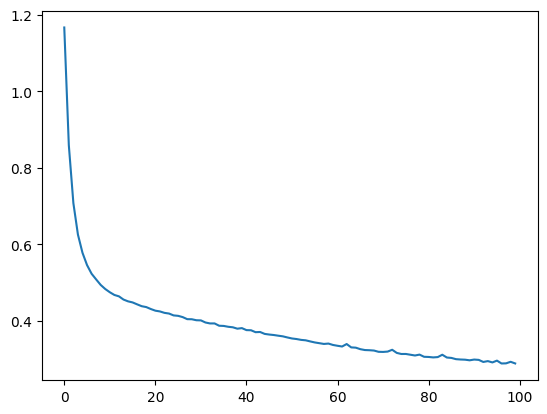

In [17]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, verbose=1)

# Visualizar la pérdida
plt.plot(history.history['loss'])


### <font color='264CC7'> Evaluación </font>

In [18]:
# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


1/1 [==============================] - 0s 42ms/step
Precisión del modelo: 0.84
Matriz de confusión:
[[16  1  0]
 [ 2  9  0]
 [ 0  2  1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.75      0.82      0.78        11
           2       1.00      0.33      0.50         3

    accuracy                           0.84        31
   macro avg       0.88      0.70      0.73        31
weighted avg       0.85      0.84      0.83        31

